<a href="https://colab.research.google.com/github/ezayustitio/UAS-BENGKOD/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
pd.set_option("display.max_columns", None)

### **1. Mengumpulan** **data**

In [ ]:
df = pd.read_csv('water_potability.csv')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## **2. Menelaah data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df['ph'].unique()
df['ph'].value_counts()

,count
ph,
3.716080,1
6.704432,1
5.915807,1
8.136498,1
6.493764,1
...,...
7.808012,1
5.895949,1
7.269652,1


### **3. Validasi dan visualisasi data**

In [ ]:
resume = []
print("\nCek Nilai Kosong:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() > 0:
    resume.append(f"Terdapat nilai kosong pada {missing_values[missing_values > 0].shape[0]} kolom.")
else:
    resume.append("Tidak ditemukan nilai kosong di dataset.")


Cek Nilai Kosong:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
column_means= df.mean()
df_clean = df.fillna(column_means)

In [ ]:
resume = []
print("\nCek Nilai Kosong:")
missing_values = df_clean.isnull().sum()
print(missing_values)
if missing_values.sum() > 0:
    resume.append(f"Terdapat nilai kosong pada {missing_values[missing_values > 0].shape[0]} kolom.")
else:
    resume.append("Tidak ditemukan nilai kosong di dataset.")


Cek Nilai Kosong:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
olumn_means= df.mean()
df_clean = df.fillna(column_means)

In [ ]:
resume = []
print("\nCek Nilai Kosong:")
missing_values = df_clean.isnull().sum()
print(missing_values)
if missing_values.sum() > 0:
    resume.append(f"Terdapat nilai kosong pada {missing_values[missing_values > 0].shape[0]} kolom.")
else:
    resume.append("Tidak ditemukan nilai kosong di dataset.")


Cek Nilai Kosong:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


NameError: name 'df_new' is not defined

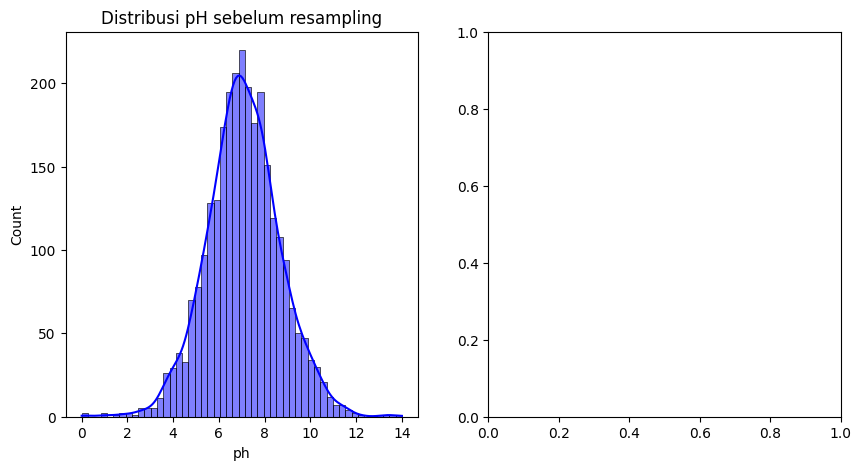

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df, x="ph", color='blue', kde=True)
plt.title('Distribusi pH sebelum resampling')

plt.subplot(1, 2, 2)
sns.histplot(df_new, x="ph", color='red', kde=True)
plt.title('Distribusi pH sesudah resampling')

plt.show()

## **4. Menentukan objek data**

In [ ]:
df_clean.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df_clean.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.775777,327.459760,16.140368,78.698446,2.309149,1


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df_clean.value_counts()

,,,,,,,,,,count
ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,
0.000000,214.846144,49456.587108,7.897539,333.775777,583.448849,7.702328,77.712891,4.928840,0,1
7.466558,212.816030,16679.673622,5.436264,366.601344,358.909589,6.134210,46.655429,4.991675,1,1
7.457165,263.036704,31085.083433,1.683993,333.775777,584.604354,11.809444,45.501362,4.106543,0,1
7.457980,183.461310,14733.458757,7.475273,335.668046,482.637180,8.963254,82.581338,4.497731,1,1
7.458708,207.786573,10513.296781,8.920633,333.775777,442.368143,18.725302,43.898088,2.938082,0,1
...,...,...,...,...,...,...,...,...,...,...
6.655605,216.441172,20571.845708,8.984237,333.775777,336.831455,17.745996,71.704305,2.951645,0,1
6.657794,205.543176,18844.037031,6.734228,363.397930,555.899038,8.006966,66.934782,3.868926,0,1
6.658742,216.564702,25172.585759,6.785521,330.517558,620.448963,19.095091,82.244095,3.400988,1,1


## **5. Membersihkan data**

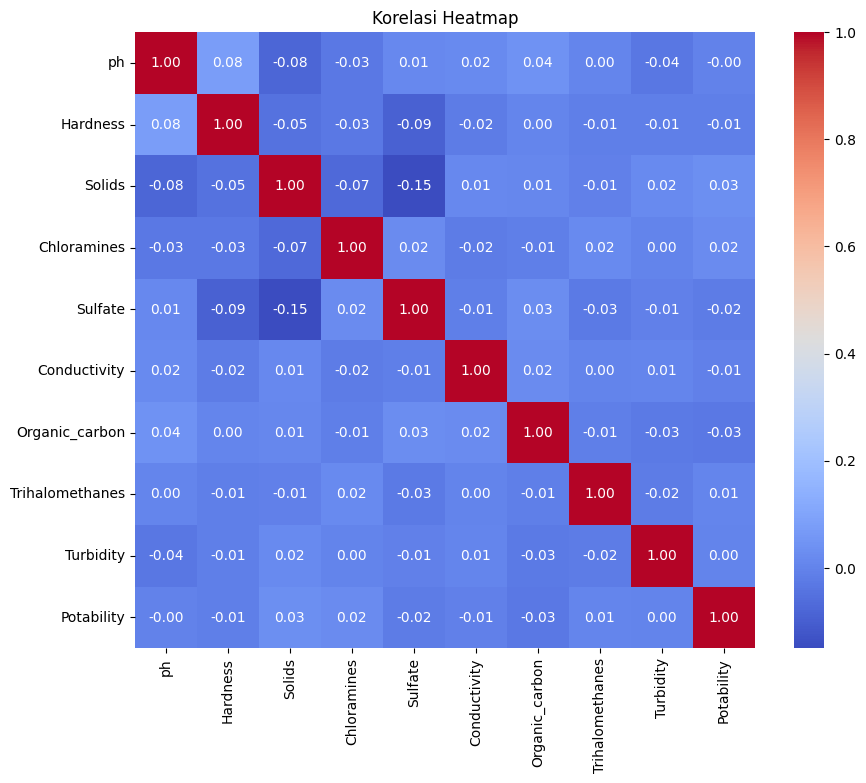

In [ ]:
correlation_matrix = df_clean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Heatmap')
plt.show()

NameError: name 'df_new' is not defined

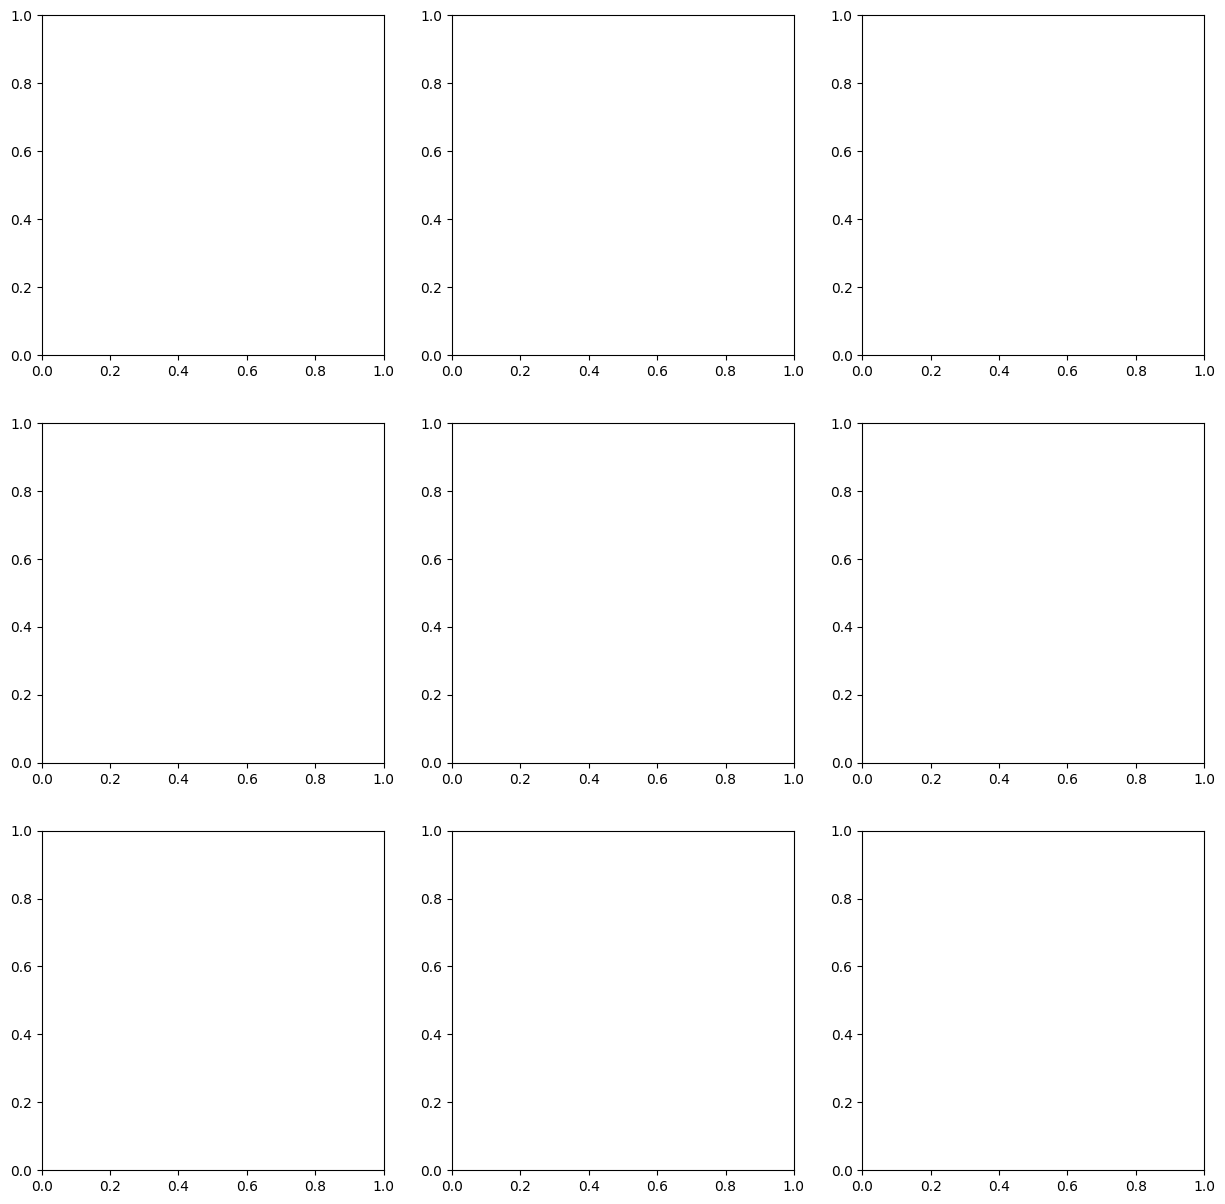

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

columns = df_clean.columns

for i, col in enumerate(columns):
    sns.histplot(df_new[col], bins=30, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## **6. Membuat model**

In [ ]:
model_summary = []

target_column = 'Potability'
if target_column in df_clean.columns:
    model_summary.append(f"Kolom target yang digunakan adalah '{target_column}'.")
else:
    raise ValueError(f"Kolom target '{target_column}' tidak ditemukan dalam dataset.")

X = df_clean.drop(columns=[target_column])
y = df_clean[target_column]

model_summary.append(f"Data telah dipisahkan menjadi fitur (X) dan label (y).")
model_summary.append(f"Fitur (X) memiliki {X.shape[1]} kolom dan {X.shape[0]} baris.")
model_summary.append(f"Label (y) memiliki {len(y.unique())} kategori unik.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_summary.append("Dataset telah dibagi menjadi data latih (80%) dan data uji (20%).")

imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
model_summary.append("Nilai kosong dalam data telah diimputasi menggunakan rata-rata (mean).")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_summary.append("Data fitur telah distandarisasi menggunakan StandardScaler.")

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

results = {}

for name, model in models.items():
    print(f"\nTraining model: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    model_summary.append(f"Model '{name}' memiliki Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}.")

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

print("\n===== SUMMARY HASIL MODEL =====")
for i, summary in enumerate(model_summary, 1):
    print(f"{i}. {summary}")

for name, result in results.items():
    print(f"\nConfusion Matrix for {name}:")
    print(result["Confusion Matrix"])
    print(f"\nClassification Report for {name}:")
    print(result["Classification Report"])

In [ ]:
cm = results['Decision Tree']['Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

cm = results['Random Forest']['Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

cm = results['Logistic Regression']['Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

NameError: name 'results' is not defined

# **7. Kesimpulan**
akurasi decision tree
akurasi random forest
akurasi logistic regression
random forest menjadi algoritma yang paling optimal untuk kasus kualifikasi data kualitas air dan kelayakan minum